In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
url = 'https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv'
data = pd.read_csv(url)

In [10]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [13]:
data.shape

(400, 5)

In [15]:
display(data.isnull().any())

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [16]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [37]:
test_target = data
target = test_target.iloc[:, 4]
features = test_target.iloc[:,[2,3]]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Watson Turbo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Watson Turbo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Watson Turbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [49]:
#For small datasets "liblinear" solver should be used
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [77]:
print(cm)

[[65  3]
 [ 8 24]]


In [55]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11
Mean Squared Error: 0.11
Root Mean Squared Error: 0.33166247903553997


In [57]:
#To retrieve the intercept:
print(classifier.intercept_)
#For retrieving the slope:
print(classifier.coef_)

[-0.92421803]
[[2.06169269 1.10338288]]


In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
60,0,0
155,0,0
261,1,1
141,0,0
214,0,1


In [76]:
print(cm)

[[65  3]
 [ 8 24]]


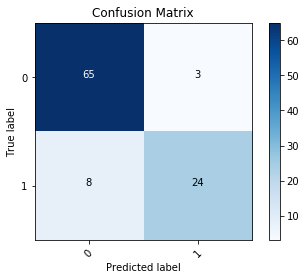

In [79]:
import itertools
plt.imshow(cm,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(target) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cm.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

SyntaxError: invalid syntax (<ipython-input-84-18e857b6e315>, line 4)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



<font color = green><i> Precision = # of correct positive results / all positive ruslts
______________________________    
Recall = number of correct positivee results divided by number of all relevant samples
_______________________________

F1 Score is the harmonic mean of P &  R. 
_______________________________
<b> Based on Age and Salary we can predict a purchase accurately. 